In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time

### 个体决策过程:  
对于节点i, 有线上successors集合$g_{1, i}$，线下neighbors集合$g_{2, i}$，分别由线上网络$G_1$和$G_2$定义。$G_1$为有向网络，$G_2$为无向网络。节点i受两大类要素影响，第一类为广告影响，第二类为社会网络影响，其中又分为线上网络和线下网络。  
决策规则为：  
>   $prob(i) = 1 - (1 - p)\cdot(1 - q_1)^{a_{1,i}(t)}\cdot(1 - q_2)^{a_{2,i}(t)}$,

其中$a_{1, i}(t)$表示t时期$g_{1, i}$中已采纳者数量，$a_{2, i}(t)$表示t时期$g_{2,i}$中已采纳者数量。

In [2]:
class mult_diff:
    
    def __init__(self, p, q1, q2, G1, G2, num_runs=40):
        self.num_runs = num_runs
        self.p = p
        self.q1 = q1
        self.q2 = q2
        self.G1 = G1  # 线下网络
        self.G2 = G2  # 线上网络
  

    def update(self, non_adopt_set):
        influ_1 = np.array([np.sum([self.G1.nodes[k]['state'] for k in self.G1.nodes[i]['neigh']]) 
                            for i in non_adopt_set])
        
        influ_2 = np.array([np.sum([self.G1.nodes[k]['state'] for k in self.G1.nodes[i]['prede']]) 
                            for i in non_adopt_set])
        
        prob = 1 - (1 - self.p) * (1 - self.q1) ** influ_1 * (1 - self.q2) ** influ_2
        upda = np.less_equal(np.random.random(len(non_adopt_set)), prob)  # 概率决策规则, 集体更新
        for i, j in enumerate(non_adopt_set):  # 更新, i为upda的索引, j为未采纳节点的编号
            G1.nodes[j]['state'] = upda[i]
        
        return np.sum(upda), non_adopt_set[np.logical_not(upda)]
        
        
    def sing_diff(self):  # 单次扩散
        for i in self.G1:  # 在G1上初始化属性
            self.G1.nodes[i]['state'] = False
            self.G1.nodes[i]['neigh'] = list(G1.neighbors(i))  # offline neighbors
            self.G1.nodes[i]['prede'] = list(G2.predecessors(i))  # online predecessors
            
        non_adopt_set = np.array([i for i in self.G1 if not self.G1.nodes[i]['state']]) # 未采纳节点集合
        num_of_adopt = []
        for u in range(self.num_runs):                                 
            x, non_adopt_set = self.update(non_adopt_set)
            num_of_adopt.append(x)
            
        return num_of_adopt
    
    
    def repete_diff(self, repetes): #多次扩散
        adopt_cont = []
        for i in range(repetes):
            num_of_adopt = self.sing_diff()
            adopt_cont.append(num_of_adopt)
            
        return adopt_cont  

In [ ]:
class mult_belief_diff:
    
    def __init__(self, , p, q1, q2, G1, G2, num_runs=40):
        self.num_runs = num_runs
        self.p = p
        self.q1 = q1
        self.q2 = q2
        self.G1 = G1  # 线下网络
        self.G2 = G2  # 线上网络
        
        s
  
    def belief_update(self):
        
    
    def state_update(self, non_adopt_set):
        influ_1 = np.array([np.sum([self.G1.nodes[k]['state'] for k in self.G1.nodes[i]['neigh']]) 
                            for i in non_adopt_set])
        
        influ_2 = np.array([np.sum([self.G1.nodes[k]['state'] for k in self.G1.nodes[i]['prede']]) 
                            for i in non_adopt_set])
        
        prob = 1 - (1 - self.p) * (1 - self.q1) ** influ_1 * (1 - self.q2) ** influ_2
        upda = np.less_equal(np.random.random(len(non_adopt_set)), prob)  # 概率决策规则, 集体更新
        for i, j in enumerate(non_adopt_set):  # 更新, i为upda的索引, j为未采纳节点的编号
            G1.nodes[j]['state'] = upda[i]
        
        return np.sum(upda), non_adopt_set[np.logical_not(upda)]
        
        
    def sing_diff(self):  # 单次扩散
        for i in self.G1:  # 在G1上初始化属性
            self.G1.nodes[i]['state'] = False
            self.G1.nodes[i]['neigh'] = list(G1.neighbors(i))  # offline neighbors
            self.G1.nodes[i]['prede'] = list(G2.predecessors(i))  # online predecessors
            
        non_adopt_set = np.array([i for i in self.G1 if not self.G1.nodes[i]['state']]) # 未采纳节点集合
        num_of_adopt = []
        for u in range(self.num_runs):                                 
            x, non_adopt_set = self.update(non_adopt_set)
            num_of_adopt.append(x)
            
        return num_of_adopt
    
    
    def repete_diff(self, repetes): #多次扩散
        adopt_cont = []
        for i in range(repetes):
            num_of_adopt = self.sing_diff()
            adopt_cont.append(num_of_adopt)
            
        return adopt_cont  

In [30]:
p = 0.001
q1 = 0.05
q2 = 0.01
G1 = nx.gnm_random_graph(10000, 30000)  # 线下网络，无向网络
G2 = nx.barabasi_albert_graph(10000, 3)  # 线上网络
G2 = G2.to_directed()  # 转化为有向网络
diff = mult_diff(p, q1, q2, G1, G2)

In [31]:
t1 = time.clock()
diff_cont = diff.repete_diff(2)
print '%2.f s' % (time.clock() - t1)

12 s


In [32]:
mean_diff = np.mean(diff_cont, axis=0)  # 平均采纳人数

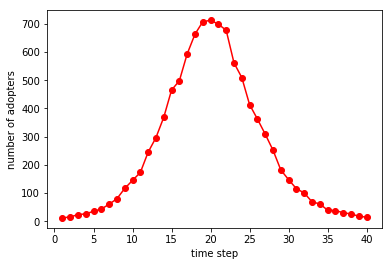

In [33]:
plt.xlabel('time step')
plt.ylabel('number of adopters')
plt.plot(np.arange(1, 41), mean_diff, 'ro-')

In [8]:
import csv
csv_data = csv.reader(open('301_301_2.csv'))

In [9]:
d_list = []
for row in csv_data:
    d_list.append(row)

In [10]:
for x in d_list[0]:
    print(x)

﻿gender
education
age
job
5、您是否使用过Airbnb、小猪短租、蚂蚁短租等平台租用共享房屋？
6、您日常生活中经常联系的朋友和亲人数目为？
7、朋友或亲人们觉得共享房屋很有用。
8、朋友或亲人们觉得共享房屋价格低廉。
9、朋友或亲人们觉得可以从共享房屋服务中获得切实实惠。
10、朋友或亲人们觉得共享房屋体验不错。
11、朋友或亲人们觉得共享房屋带来了生活品质的提升。
12、您关注的网络红人和明星数目为？
13、网络红人或明星们觉得共享房屋很有用。
14、网络红人或明星们觉得共享房屋价格低廉。
15、网络红人或明星们觉得可以从共享房屋服务中获得切实实惠。
16、网络红人或明星们觉得共享房屋体验不错。
17、网络红人或明星们觉得共享房屋带来了生活品质的提升。
18、我日常浏览网页时经常会看到关于共享房屋的广告或讨论。
19、我经常收到共享房屋企业发来的推送或消息。
20、我经常看到关于共享房屋的平面广告或电视广告。
21、我倾向于使用共享房屋
22、我未来会使用共享房屋
23、我会持续使用共享房屋


In [11]:
clean_data = [d_list[0]]
for d in d_list[1:]:
    new_d = []
    for j, u in enumerate(d):
        if j == 5 or j == 11:
            if u.isdigit():
                x = int(u)
            else: 
                x = None
        else:
            x = int(u)
            
        new_d.append(x)
    clean_data.append(new_d)

In [12]:
clean_data[2]

[2, 4, 2, 1, 2, None, 3, 3, 3, 3, 3, None, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

(array([ 155.,    2.]),
 array([   2.,  252.,  502.]),
 <a list of 2 Patch objects>)

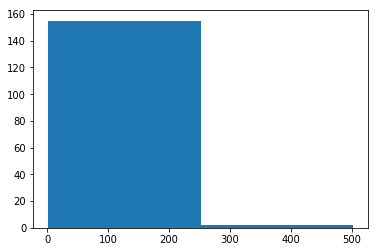

In [29]:
plt.hist([x for x in u if x], bins=2)

In [14]:
u = [x[5] for x in clean_data[1:]]

In [15]:
u = [x for x in u if x]

In [16]:
max_idx = u.index(max(u))

In [17]:
del u[max_idx]

In [18]:
sum(u) / len(u)

14

In [19]:
v = [x[11] for x in clean_data[1:]]
v = [x for x in v if x]
max_idx = v.index(max(v))
del u[max_idx]

In [21]:
sum(v) / len(v)

1515205

In [23]:
def get_distr(d_list):
    d_dict = {}
    for x in d_list:
        if x in d_dict:
            d_dict[x] += 1
        else:
            d_dict[x] = 1
    return d_dict

In [24]:
d = get_distr(u)

In [25]:
get_distr(u)

{2: 6,
 3: 11,
 4: 8,
 5: 36,
 6: 13,
 7: 2,
 8: 15,
 9: 1,
 10: 37,
 11: 1,
 15: 3,
 20: 13,
 25: 1,
 30: 4,
 35: 1,
 50: 2,
 100: 1,
 300: 1,
 502: 1}